## IMDB Graded Questions : Multinomial/Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building
    - Model evaluation

### 1. Importing and Preprocessing Data

In [3]:
import pandas as pd

path = 'movie_review_train.csv'
df = pd.read_csv(path)
df


,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...
...,...,...
1595,Neg,if anything stigmata should be taken as...
1596,Neg,john boorman s zardoz is a goofy cinemati...
1597,Neg,the kids in the hall are an acquired taste ...
1598,Neg,there was a time when john carpenter was a gr...


In [4]:
pos_neg = df['class'].value_counts()
pos_neg

class
Pos    800
Neg    800
Name: count, dtype: int64

In [5]:
df['class'] = df['class'].map({'Pos': 1, 'Neg':0})
df

,class,text
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...
...,...,...
1595,0,if anything stigmata should be taken as...
1596,0,john boorman s zardoz is a goofy cinemati...
1597,0,the kids in the hall are an acquired taste ...
1598,0,there was a time when john carpenter was a gr...


In [6]:
X_train = df['text']
y_train = df['class']
print(X_train)
print(y_train)

0        a common complaint amongst film critics is   ...
1        whew   this film oozes energy   the kind of b...
2        steven spielberg s   amistad     which is bas...
3        he has spent his entire life in an awful litt...
4        being that it is a foreign language film with...
                              ...                        
1595     if anything     stigmata   should be taken as...
1596     john boorman s   zardoz   is a goofy cinemati...
1597     the kids in the hall are an acquired taste   ...
1598     there was a time when john carpenter was a gr...
1599     two party guys bob their heads to haddaway s ...
Name: text, Length: 1600, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
1595    0
1596    0
1597    0
1598    0
1599    0
Name: class, Length: 1600, dtype: int64


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')
vect_new = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)

In [20]:
vect.fit(X_train)
vect_new.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [21]:
vect_new.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [22]:
len(vect_new.vocabulary_.keys())


1643

In [23]:
path_test = 'movie_review_test.csv'
df_test = pd.read_csv(path_test)

df_test['class'] = df_test['class'].map({'Pos': 1, 'Neg':0})

X_test = df_test['text']
y_test = df_test['class']


In [24]:
X_train_transformed = vect_new.transform(X_train)
X_test_transformed = vect_new.transform(X_test)
print(X_test_transformed.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 2 0]]


### 2. Building and Evaluating the Model

In [25]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

mnb = MultinomialNB()
bnb = BernoulliNB()

mnb.fit(X_train_transformed,y_train)
bnb.fit(X_train_transformed,y_train)

y_pred_class_mnb = mnb.predict(X_test_transformed)
y_pred_class_bnb = bnb.predict(X_test_transformed)

y_pred_prob_mnb = mnb.predict_proba(X_test_transformed)
y_pred_prob_bnb = bnb.predict_proba(X_test_transformed)



In [26]:
print('Predictions of Multinomial NB :\n ', y_pred_class_mnb)
print('Predictions of Bernoulli NB : \n', y_pred_class_bnb)

Predictions of Multinomial NB :
  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Predictions of Bernoulli NB : 
 [1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 

In [62]:
print('Prediction Prob of Multinomial NB : \n', y_pred_prob_mnb)
print('\n\nPredictions Prob of Bernoulli NB \n: ', y_pred_prob_bnb)

Prediction Prob of Multinomial NB : 
 [[4.72220911e-01 5.27779089e-01]
 [1.46791072e-02 9.85320893e-01]
 [8.06229525e-03 9.91937705e-01]
 [3.82892252e-14 1.00000000e+00]
 [9.99994569e-01 5.43053306e-06]
 [2.06482974e-19 1.00000000e+00]
 [1.84756956e-10 1.00000000e+00]
 [4.41160693e-05 9.99955884e-01]
 [6.34701076e-04 9.99365299e-01]
 [2.15099949e-03 9.97849001e-01]
 [1.67387911e-04 9.99832612e-01]
 [1.53916508e-03 9.98460835e-01]
 [9.42580804e-06 9.99990574e-01]
 [3.94569247e-06 9.99996054e-01]
 [1.30379599e-02 9.86962040e-01]
 [4.95955521e-03 9.95040445e-01]
 [4.87700524e-01 5.12299476e-01]
 [4.84740721e-11 1.00000000e+00]
 [1.45854901e-01 8.54145099e-01]
 [9.79724905e-01 2.02750951e-02]
 [1.52084321e-01 8.47915679e-01]
 [1.09017591e-03 9.98909824e-01]
 [9.99997220e-01 2.78000287e-06]
 [8.18449930e-09 9.99999992e-01]
 [2.54675473e-03 9.97453245e-01]
 [2.26674760e-03 9.97733252e-01]
 [1.07152900e-02 9.89284710e-01]
 [7.35447699e-22 1.00000000e+00]
 [2.12005460e-02 9.78799454e-01]
 [7.8

### Model Evaluation

In [27]:
from sklearn import metrics

acc_mnb = metrics.accuracy_score(y_test,y_pred_class_mnb)
prec_mnb = metrics.precision_score(y_test, y_pred_class_mnb)

acc_bnb = metrics.accuracy_score(y_test,y_pred_class_bnb)
prec_bnb = metrics.precision_score(y_test, y_pred_class_bnb)


cnf_mnb = metrics.confusion_matrix(y_test,y_pred_class_mnb)
print('Confusion Matrix for MultinomialNB: \n',cnf_mnb)

cnf_bnb = metrics.confusion_matrix(y_test,y_pred_class_bnb)
print('Confusion Matrix for BernoulliNB: \n',cnf_bnb)


print("\nAccuracy for MultinomialNB: {0}%".format(round(acc_mnb*100,2)))
print("Precision for MultinomialNB: {0}%".format(round(prec_mnb*100,2)))

print("\nAccuracy for BernoulliNB: {0}%".format(round(acc_bnb*100,2)))
print("Precision for BernoulliNB: {0}%".format(round(prec_bnb*100,2)))


Confusion Matrix for MultinomialNB: 
 [[172  28]
 [ 41 159]]
Confusion Matrix for BernoulliNB: 
 [[177  23]
 [ 61 139]]

Accuracy for MultinomialNB: 82.75%
Precision for MultinomialNB: 85.03%

Accuracy for BernoulliNB: 79.0%
Precision for BernoulliNB: 85.8%


In [28]:
def Evaluation_Metrics(y_test,y_pred_class):


    from sklearn import metrics

    acc = metrics.accuracy_score(y_test,y_pred_class)
    prec_met = metrics.precision_score(y_test, y_pred_class)

    cnf_matrix = metrics.confusion_matrix(y_test,y_pred_class)
    print('Confusion Matrix : \n',cnf_matrix)

    print("\nAccuracy : {0}%".format(round(acc*100,5)))
    print("Precision_Metric : {0}%".format(round(prec_met*100,5)))

    TN = cnf_matrix[0, 0]
    FP = cnf_matrix[0, 1]
    FN = cnf_matrix[1, 0]
    TP = cnf_matrix[1, 1]

    sensitivity = TP/(TP + FN)*100
    specificity = TN/(TN + FP)*100
    precision_calc = TP/(TP + FP)*100

    print("Precision_Calculated : {0}%".format(round(precision_calc,5)))
    print("Sensitivity : {0}%".format(round(sensitivity,5)))
    print("Specificity : {0}%".format(round(specificity,5)))



In [29]:
print("For MultinomialNB :")
Evaluation_Metrics(y_test,y_pred_class_mnb)
print("\n\nFor BernoulliNB :")
Evaluation_Metrics(y_test,y_pred_class_bnb)

For MultinomialNB :
Confusion Matrix : 
 [[172  28]
 [ 41 159]]

Accuracy : 82.75%
Precision_Metric : 85.02674%
Precision_Calculated : 85.02674%
Sensitivity : 79.5%
Specificity : 86.0%


For BernoulliNB :
Confusion Matrix : 
 [[177  23]
 [ 61 139]]

Accuracy : 79.0%
Precision_Metric : 85.80247%
Precision_Calculated : 85.80247%
Sensitivity : 69.5%
Specificity : 88.5%


In [30]:
def ROC_plot(y_test,y_pred_prob):
    from sklearn.metrics import roc_curve,auc
    import matplotlib.pyplot as plt

    FPR, TPR, th = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(FPR,TPR)

    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(FPR,TPR,)
    plt.text(0.6, 0.2, 'ROC AUC = {:.6f}'.format(roc_auc), fontsize=10)
    plt.show()


For MultinomialNB :


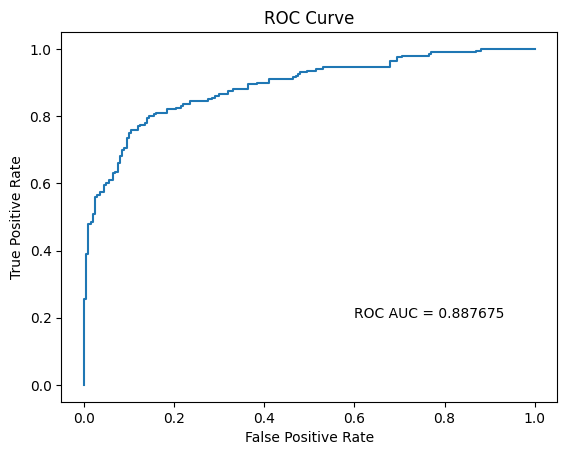


For BernoulliNB :


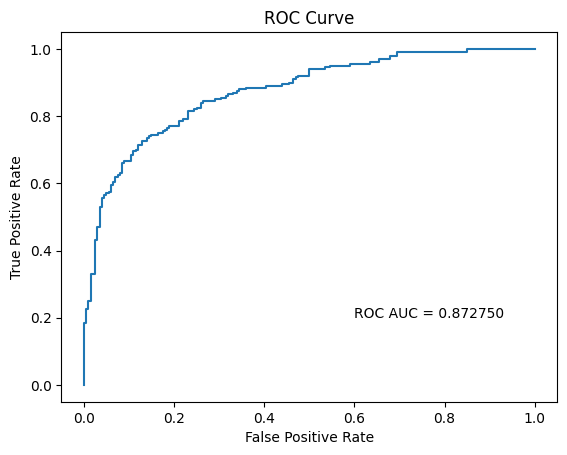

In [70]:
print("For MultinomialNB :")
ROC_plot(y_test, y_pred_prob_mnb)
print("\nFor BernoulliNB :")
ROC_plot(y_test, y_pred_prob_bnb)